In [26]:
#Importing the base libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib as mpl
mpl.style.use(['ggplot']) #use ggplot style

In [27]:
# Getting the raw data
df = pd.read_csv('housing.csv') # Notice: Raw data is in the Data folder
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
print('There are {} rows and {} columns in train'.format(df.shape[0],df.shape[1]))

There are 20640 rows and 10 columns in train


In [29]:
# As it was dsicussed in Part 1. Explanatory Data Analysis, it might be interesting to add the possibly helpful 
#attributes combinations and study their effect on modeling too

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [30]:
# Asssigning numerical values to ocean proximity in the gradient order: the lower the number the further away is the house from the ocean
# this gradient is chosen for the better and easier interpretation of models results (feature importances)

df.loc[df['ocean_proximity'] == 'NEAR OCEAN', 'ocean_proximity'] = 4
df.loc[df['ocean_proximity'] == 'NEAR BAY', 'ocean_proximity'] = 3
df.loc[df['ocean_proximity'] == '<1H OCEAN', 'ocean_proximity'] = 2
df.loc[df['ocean_proximity'] == 'INLAND', 'ocean_proximity'] = 1
df.loc[df['ocean_proximity'] == 'ISLAND', 'ocean_proximity'] = 0

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1,5.329513,0.219892,2.123209


In [31]:
# Splitting the data into training and testing sets.
train_set1, test_set1 = train_test_split(df, test_size=0.2, random_state=1)
print("Training Data", len(train_set1))
print("Testing Data", len(test_set1))

Training Data 16512
Testing Data 4128


In [32]:
# Observing missing values
missing_values_count = train_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(train_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes = train_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X = imputer.transform(housing_numerical_attributes)

Percent of data that is missing: 0.15187090041741205


In [33]:
# Observing missing values
missing_values_count = test_set1.isnull().sum()
missing_values_count[:]

total_cells   = np.product(test_set1.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells)*100
print('Percent of data that is missing:', percent_missing)

imputer = SimpleImputer(strategy = "median")
housing_numerical_attributes1 = test_set1.drop("ocean_proximity", axis = 1)
imputer.fit(housing_numerical_attributes)  
X1 = imputer.transform(housing_numerical_attributes1)

Percent of data that is missing: 0.16398330351818724


In [34]:
# Data with replaced NAN values.
# Put back the ocean proximity in train set
train_set = pd.DataFrame(X, columns = housing_numerical_attributes.columns, index = housing_numerical_attributes.index)

train_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,3,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,3,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,1,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,2,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,2,5.894904,0.179363,2.388535
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,2,4.055046,0.268100,2.474771
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,2,6.788462,0.149008,2.896154
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,2,4.890785,0.205862,2.645051
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,1,4.991614,0.190676,2.773585


In [35]:
# Data with replaced NAN values.
# Put back the ocean proximity in test set
test_set = pd.DataFrame(X1, columns = housing_numerical_attributes1.columns, index = housing_numerical_attributes1.index)

test_set.insert(9,"ocean_proximity",df["ocean_proximity"],True)
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,2,4.503205,0.238434,1.777244
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,1,4.988584,0.208238,2.609589
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,3,4.480296,0.225948,3.778325
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,3,3.908046,0.285294,2.298851
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,2,5.406360,0.189542,2.512367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,540.0,1482.0,484.0,2.3173,68200.0,1,4.915289,0.226986,3.061983
5341,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,225000.0,2,4.571429,0.218750,2.000000
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,4,5.000000,0.200000,3.666667
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,227300.0,2,5.347985,0.197945,3.036630


In [36]:
train_set_without_target = train_set.drop("median_house_value", axis=1) # drop labels for training set 
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,3,5.000000,0.202837,3.117021
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,3,4.900990,0.195286,3.204620
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,1,8.333333,0.200000,3.333333
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,2,3.805981,0.302031,2.580598
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,2,5.894904,0.179363,2.388535
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,2,4.055046,0.268100,2.474771
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,2,6.788462,0.149008,2.896154
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,2,4.890785,0.205862,2.645051
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,1,4.991614,0.190676,2.773585


In [37]:
test_set_without_target = test_set.drop("median_house_value", axis=1) # drop labels for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,2,4.503205,0.238434,1.777244
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,1,4.988584,0.208238,2.609589
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,3,4.480296,0.225948,3.778325
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,3,3.908046,0.285294,2.298851
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,2,5.406360,0.189542,2.512367
...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,540.0,1482.0,484.0,2.3173,1,4.915289,0.226986,3.061983
5341,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,2,4.571429,0.218750,2.000000
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,4,5.000000,0.200000,3.666667
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,2,5.347985,0.197945,3.036630


In [38]:
# Creating pandas series full of zeros to store the standard deviation and the mean from the training set.
std_dev_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")
mean_tr= pd.Series({col:0 for col in train_set_without_target.columns}, dtype="float32")

# Getting the values for the mean and standard deviation from the training dataset.
for col in train_set_without_target.columns:
    std_dev_tr[col]= train_set_without_target[col].std()
    mean_tr[col]= train_set_without_target[col].mean()
    # Changing the training data so it is normalized with the mean and standard deviation from the training set.
    train_set_without_target[col]=(train_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

for col in test_set_without_target.columns:
    # Changing the testing data so it is normalized with the mean and standard deviation from the training set.
    test_set_without_target[col]=(test_set_without_target[col]-mean_tr[col])/std_dev_tr[col]

In [39]:
train_set_without_target.insert(12,"median_house_value",train_set["median_house_value"]) #Put back the target values for train set
train_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901,255600.0
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455,114600.0
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553,137500.0
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352,118800.0
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913,422700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477,205300.0
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143,500001.0
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795,104800.0
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712,140700.0


In [40]:
train=train_set_without_target
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901,255600.0
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455,114600.0
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553,137500.0
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352,118800.0
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913,422700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477,205300.0
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143,500001.0
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795,104800.0
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712,140700.0


In [41]:
test_set_without_target.insert(12,"median_house_value",test_set["median_house_value"]) #Put back the target values for test set
test_set_without_target

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.05655,-0.358840,0.433935,-0.113623,355000.0
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853,70700.0
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923,229400.0
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646,112500.0
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.05655,-0.013297,-0.404725,-0.050236,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,-0.119733,0.004721,0.050494,-0.043389,-0.824097,-1.087176,-0.201178,0.237562,-0.002844,68200.0
5341,0.565003,-0.745030,1.620488,-1.198109,-1.267546,-1.255839,-1.290644,-0.892717,-0.05655,-0.332738,0.096284,-0.094415,225000.0
16888,-1.392580,0.920789,-0.206933,-1.205920,-1.277094,-1.258508,-1.301103,0.619508,2.004703,-0.168768,-0.225343,0.049295,350000.0
6823,0.734361,-0.721634,1.064316,-0.541986,-0.594414,-0.530593,-0.595110,0.528050,-0.05655,-0.035631,-0.260590,-0.005030,227300.0


In [42]:
test=test_set_without_target
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.05655,-0.358840,0.433935,-0.113623,355000.0
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853,70700.0
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923,229400.0
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646,112500.0
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.05655,-0.013297,-0.404725,-0.050236,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,-0.119733,0.004721,0.050494,-0.043389,-0.824097,-1.087176,-0.201178,0.237562,-0.002844,68200.0
5341,0.565003,-0.745030,1.620488,-1.198109,-1.267546,-1.255839,-1.290644,-0.892717,-0.05655,-0.332738,0.096284,-0.094415,225000.0
16888,-1.392580,0.920789,-0.206933,-1.205920,-1.277094,-1.258508,-1.301103,0.619508,2.004703,-0.168768,-0.225343,0.049295,350000.0
6823,0.734361,-0.721634,1.064316,-0.541986,-0.594414,-0.530593,-0.595110,0.528050,-0.05655,-0.035631,-0.260590,-0.005030,227300.0


In [43]:
# First, we will split between features and target value (labels) for train set

housing = train.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train["median_house_value"].copy()

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
15961,-1.422467,0.972261,1.858847,-0.564960,-0.601575,-0.486099,-0.571577,-0.362315,0.974077,-0.168768,-0.176681,0.001901
1771,-1.382618,1.084563,1.064316,-0.530499,-0.592027,-0.404231,-0.516666,-0.141019,0.974077,-0.206649,-0.306201,0.009455
16414,-0.829713,1.061167,-1.001464,-1.189839,-1.260385,-1.250499,-1.293259,-0.661429,-1.087176,1.106550,-0.225343,0.020553
5056,0.609833,-0.754389,0.428691,1.184701,2.477644,1.880071,2.275932,-1.248609,-0.05655,-0.625594,1.524846,-0.044352
8589,0.589909,-0.815219,0.746504,-0.362334,-0.491774,-0.600893,-0.487903,1.828865,-0.05655,0.173618,-0.579347,-0.060913
...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.843946,-0.876050,-0.922011,-0.400469,-0.152821,-0.308125,-0.168899,-1.106929,-0.05655,-0.530303,0.942798,-0.053477
17289,-0.027751,-0.567218,1.064316,-0.401848,-0.656476,-0.598223,-0.629102,2.476576,-0.05655,0.515489,-1.100022,-0.017143
5192,0.654663,-0.796502,1.064316,-0.554392,-0.580093,-0.578646,-0.542814,-1.450398,-0.05655,-0.210553,-0.124792,-0.038795
12172,1.202587,-0.890087,-1.478182,-0.118815,-0.200561,-0.090996,-0.061692,-0.657623,-1.087176,-0.171977,-0.385278,-0.027712


In [44]:
# Second, we will split between features and target value (labels) for test set

housing_t = test.drop("median_house_value", axis=1) # drop labels for test set
housing_labels_t = test["median_house_value"].copy()

housing_t

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4712,0.604852,-0.735672,0.825957,0.078298,0.315029,-0.281429,0.322682,-0.331018,-0.05655,-0.358840,0.433935,-0.113623
2151,-0.102468,0.537089,0.667051,-0.208871,-0.198174,-0.251173,-0.163669,-1.003259,-1.087176,-0.173136,-0.084033,-0.041853
15927,-1.417486,0.981619,1.382128,-0.377037,-0.303201,0.096767,-0.247342,0.072453,0.974077,-0.367605,0.219760,0.058923
82,-1.347750,1.019053,1.858847,-1.056592,-1.052717,-1.090322,-1.081461,-1.245173,0.974077,-0.586545,1.237744,-0.068646
8161,0.719418,-0.847974,0.667051,-0.509823,-0.592027,-0.635598,-0.568962,0.689026,-0.05655,-0.013297,-0.404725,-0.050236
...,...,...,...,...,...,...,...,...,...,...,...,...
2319,-0.062619,0.555806,-0.286386,-0.119733,0.004721,0.050494,-0.043389,-0.824097,-1.087176,-0.201178,0.237562,-0.002844
5341,0.565003,-0.745030,1.620488,-1.198109,-1.267546,-1.255839,-1.290644,-0.892717,-0.05655,-0.332738,0.096284,-0.094415
16888,-1.392580,0.920789,-0.206933,-1.205920,-1.277094,-1.258508,-1.301103,0.619508,2.004703,-0.168768,-0.225343,0.049295
6823,0.734361,-0.721634,1.064316,-0.541986,-0.594414,-0.530593,-0.595110,0.528050,-0.05655,-0.035631,-0.260590,-0.005030


In [45]:
#DSE511. Project 3. Part3. Modeling. Code for Linear Regression, Lasso, Ridge, ElasticNet modeling.Albina Jetybayeva
def regression_Albina(housing, housing_labels, housing_t, housing_labels_t):
    #Import basic libraries
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import LabelEncoder
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import train_test_split
    import matplotlib as mpl
    #%%time
    #Model Linear Regression
    print("Linear Regression")
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(housing, housing_labels)
    #%%time
    housing_pred = lin_reg.predict(housing_t)
    #Evaluate model
    from sklearn.metrics import mean_squared_error
    lin_mse = mean_squared_error(housing_labels_t, housing_pred)
    lin_rmse = np.sqrt(lin_mse)
    print("RMSE for Linear Regression: ", lin_rmse)
    from sklearn.metrics import mean_absolute_error
    lin_mae = mean_absolute_error(housing_labels_t, housing_pred)
    print("MAE for Linear Regression: ", lin_mae)
    from sklearn.model_selection import cross_val_score
    lin_scores = cross_val_score(lin_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
    lin_rmse_scores = np.sqrt(-lin_scores)
    lin_rmse_scores_mean=lin_rmse_scores.mean()
    print("Cross validation mean score for Linear Regression: ", lin_rmse_scores_mean)
    lr_confidence = lin_reg.score(housing_t, housing_labels_t)
    print("Confidence score for Linear Regression: ", lr_confidence)
    #Visualize the predicted and actual prices
    from sklearn.metrics import r2_score
    housing_pred_lr = lin_reg.predict(housing_t)
    plt.figure()
    plt.errorbar(housing_labels_t, housing_pred_lr, fmt='o', alpha=0.2)
    plt.title('Linear regression, R2=%.2f' % r2_score(housing_labels_t, housing_pred_lr))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    importance = lin_reg.coef_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    #To get the exact names of features create the table
    coef_table = pd.DataFrame(list(housing.columns)).copy()
    coef_table.columns = ['Features']
    coef_table.insert(len(coef_table.columns),"Coefs",lin_reg.coef_.transpose())
    print(coef_table)
    coef_table_sorted=coef_table.sort_values(by='Coefs')
    from matplotlib.pyplot import figure
    figure()
    # Creating a horizontal graph with the values from the pandas Series.
    coef_table_sorted.plot.barh(x='Features', y='Coefs', color="green")
    plt.title("Feature importance for Linear Regression")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
    #To evaluate the performance of the Linear Regression model from the different perspective 
    #the only important features observed above will be considered in the next part. 
    #So that "total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household" will be dropped.
    
    #Linear Regression dropped features
    print("Linear Regression with dropped features")
    housing_new = housing.drop(["total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household"], axis=1) # drop labels for training set
    housing_t_new = housing_t.drop(["total_rooms", "total_bedrooms", "ocean_proximity", "population_per_household"], axis=1) # drop labels for training set
    #%%time
    lin_reg1 = LinearRegression()
    lin_reg1.fit(housing_new, housing_labels)
    #%%time
    housing_pred1 = lin_reg1.predict(housing_t_new)
    #Evaluate Model
    lin_mse1 = mean_squared_error(housing_labels_t, housing_pred1)
    lin_rmse1 = np.sqrt(lin_mse1)
    print("RMSE for Linear Regression with dropped features: ", lin_rmse1)
    lin_mae1 = mean_absolute_error(housing_labels_t, housing_pred1)
    print("MAE for Linear Regression with dropped features: ",lin_mae1)
    lin_scores1 = cross_val_score(lin_reg1, housing_new, housing_labels, scoring="neg_mean_squared_error", cv=10)
    lin_rmse_scores1 = np.sqrt(-lin_scores1)
    lin_rmse_scores1_mean=lin_rmse_scores1.mean()
    print("Cross validation mean score for Linear Regression with droppped features: ", lin_rmse_scores1_mean)
    lr_confidence1 = lin_reg1.score(housing_t_new, housing_labels_t)
    print("Confidence score for Linear Regression with dropped features: ", lr_confidence1)
    importance_lr1 = lin_reg1.coef_
    # summarize feature importance
    for i,v in enumerate(importance_lr1):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance_lr1))], importance_lr1)
    plt.show()
    coef_table1 = pd.DataFrame(list(housing_new.columns)).copy()
    coef_table1.columns = ['Features']
    coef_table1.insert(len(coef_table1.columns),"Coefs",lin_reg1.coef_.transpose())
    print(coef_table1)
    coef_table_sorted1=coef_table1.sort_values(by='Coefs')
    figure()
    # Creating a horizontal graph with the values from the pandas Series.
    coef_table_sorted1.plot.barh(x='Features', y='Coefs', color="green")
    plt.title("Feature importance for Linear Regression with dropped features")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
    #Ridge
    print("Ridge")
    #%%time
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha=1)
    ridge.fit(housing, housing_labels)
    #%%time
    housing_pred_r = ridge.predict(housing_t)
    from sklearn.model_selection import GridSearchCV
    #Grid Search
    clf = Ridge()
    grid_values = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, scoring='neg_mean_squared_error',cv=5)
    grid_clf_acc.fit(housing, housing_labels)
    print("Best tuned alpha: ", grid_clf_acc.best_estimator_)
    #Predict values based on new parameters
    y_pred_acc = grid_clf_acc.predict(housing_t)
    #Evaluate model
    lin_mse_r = mean_squared_error(housing_labels_t, housing_pred_r)
    lin_rmse_r = np.sqrt(lin_mse_r)
    print("RMSE for Ridge: ", lin_rmse_r)
    lin_mse_r1 = mean_squared_error(housing_labels_t, y_pred_acc) #alpha=10
    lin_rmse_r1 = np.sqrt(lin_mse_r1)
    print("RMSE for Ridge - tuned hyperparameter: ", lin_rmse_r1)
    lin_mae_r = mean_absolute_error(housing_labels_t, housing_pred_r)
    print("MAE for Ridge: ", lin_mae_r)
    lin_mae_r1 = mean_absolute_error(housing_labels_t, y_pred_acc) #alpha=10
    print("MAE for Ridge - tuned hyperparameter: ", lin_mae_r1)
    lin_scores_r = cross_val_score(ridge, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
    lin_rmse_scores_r = np.sqrt(-lin_scores_r)
    lin_rmse_scores_r_mean=lin_rmse_scores_r.mean()
    print("Cross validation mean score for Ridge: ", lin_rmse_scores_r_mean)
    lr_confidence_r = ridge.score(housing_t, housing_labels_t)
    print("Confidence score for Ridge: ", lr_confidence_r)
    importance_r1 = ridge.coef_
    # summarize feature importance
    for i,v in enumerate(importance_r1):
        print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
    plt.bar([x for x in range(len(importance_r1))], importance_r1)
    plt.show()
    coef_table_r = pd.DataFrame(list(housing.columns)).copy()
    coef_table_r.columns = ['Features']
    coef_table_r.insert(len(coef_table_r.columns),"Coefs",ridge.coef_.transpose())
    print(coef_table_r)
    coef_table_sorted_r=coef_table_r.sort_values(by='Coefs')
    figure()
    # Creating a horizontal graph with the values from the pandas Series.
    coef_table_sorted_r.plot.barh(x='Features', y='Coefs', color="green")
    plt.title("Feature importance for Ridge")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
    #Lasso
    print("Lasso")
    #%%time
    from sklearn import linear_model
    lasso = linear_model.Lasso(alpha=1)
    lasso.fit(housing, housing_labels)
    #%%time
    housing_pred_l = lasso.predict(housing_t)
    from sklearn.model_selection import GridSearchCV
    #Grid Search
    clf2 = linear_model.Lasso()
    grid_values2 = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
    grid_clf_acc2 = GridSearchCV(clf2, param_grid = grid_values2, scoring='neg_mean_squared_error',cv=5)
    grid_clf_acc2.fit(housing, housing_labels)
    print("Best tuned alpha: ", grid_clf_acc2.best_estimator_)
    #Predict values based on new parameters
    y_pred_acc2 = grid_clf_acc2.predict(housing_t)
    #Evaluate model
    lin_mse_l = mean_squared_error(housing_labels_t, housing_pred_l)
    lin_rmse_l = np.sqrt(lin_mse_l)
    print("RMSE for Lasso: ", lin_rmse_l)
    lin_mse_l2 = mean_squared_error(housing_labels_t, y_pred_acc2)
    lin_rmse_l2 = np.sqrt(lin_mse_l2)
    print("RMSE for Lasso - tuned hyperparameter: ", lin_rmse_l2)
    lin_mae_l = mean_absolute_error(housing_labels_t, housing_pred_l)
    print("MAE for Lasso: ", lin_mae_l)
    lin_mae_l2 = mean_absolute_error(housing_labels_t, y_pred_acc2)
    print("MAE for Lasso - tuned hyperparameter: ", lin_mae_l2)
    lin_scores_l = cross_val_score(lasso, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
    lin_rmse_scores_l = np.sqrt(-lin_scores_l)
    lin_rmse_scores_l_mean=lin_rmse_scores_l.mean()
    print("Cross validation mean score for Lasso: ", lin_rmse_scores_l_mean)
    lin_scores_l2 = cross_val_score(grid_clf_acc2, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
    lin_rmse_scores_l2 = np.sqrt(-lin_scores_l2)
    lin_rmse_scores_l2_mean=lin_rmse_scores_l2.mean()
    print("Cross validation mean score for Lasso - tuned hyperparameter: ", lin_rmse_scores_l2_mean)
    lr_confidence_l = lasso.score(housing_t, housing_labels_t)
    print("Confidence score for Lasso: ", lr_confidence_l)
    lasso2 = linear_model.Lasso(alpha=100)
    lasso2.fit(housing, housing_labels)
    lr_confidence_l2 = lasso2.score(housing_t, housing_labels_t)
    print("Confidence score for Lasso - tuned hyperparameter: ", lr_confidence_l2)
    importance_las = lasso.coef_
    # summarize feature importance
    for i,v in enumerate(importance_las):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance_las))], importance_las)
    plt.show()
    coef_table_l = pd.DataFrame(list(housing.columns)).copy()
    coef_table_l.columns = ['Features']
    coef_table_l.insert(len(coef_table_l.columns),"Coefs",lasso.coef_.transpose())
    print(coef_table_l)
    coef_table_sorted_l=coef_table_l.sort_values(by='Coefs')
    figure()
    # Creating a horizontal graph with the values from the pandas Series.
    coef_table_sorted_l.plot.barh(x='Features', y='Coefs', color="green")
    plt.title("Feature importance for Lasso")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
    #ElasticNet
    print("ElasticNet")
    ##%%time
    from sklearn.linear_model import ElasticNet
    en = ElasticNet(alpha=1) #l1_ratio=0.5
    en.fit(housing, housing_labels)
    ##%%time
    housing_pred_en = en.predict(housing_t)
    #Grid Search
    clf3 = ElasticNet()
    grid_values3 = {'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100], 'l1_ratio': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}
    grid_clf_acc3 = GridSearchCV(clf3, param_grid = grid_values3, scoring='neg_mean_squared_error',cv=5)
    grid_clf_acc3.fit(housing, housing_labels)
    print("Best tuned alpha and l1_ratio: ", grid_clf_acc3.best_estimator_)
    #Predict values based on new parameters
    y_pred_acc3 = grid_clf_acc3.predict(housing_t)
    #Evaluating model
    lin_mse_en = mean_squared_error(housing_labels_t, housing_pred_en)
    lin_rmse_en = np.sqrt(lin_mse_en)
    print("RMSE for ElasticNet: ", lin_rmse_en) #l1_ratio=0.5, alpha =1
    en1 = ElasticNet(alpha=100) #l1_ratio=0.5
    en1.fit(housing, housing_labels)
    housing_pred_en1 = en1.predict(housing_t)
    lin_mse_en1 = mean_squared_error(housing_labels_t, housing_pred_en1)
    lin_rmse_en1 = np.sqrt(lin_mse_en1)
    print("RMSE for ElasticNet - tuned hyperparameter: ", lin_rmse_en1) #l1_ratio=0.5, alpha=100
    lin_mae_en = mean_absolute_error(housing_labels_t, housing_pred_en)
    print("MAE for ElasticNet: ", lin_mae_en)
    lin_scores_en = cross_val_score(en, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
    lin_rmse_scores_en = np.sqrt(-lin_scores_en)
    lin_rmse_scores_en_mean=lin_rmse_scores_en.mean()
    print("Cross validation mean score for ElasticNet: ", lin_rmse_scores_en_mean)    
    lr_confidence_en = en.score(housing_t, housing_labels_t)
    print("Confidence score for ElasticNet: ", lr_confidence_en)
    coef_table_en = pd.DataFrame(list(housing.columns)).copy()
    coef_table_en.columns = ['Features']
    coef_table_en.insert(len(coef_table_en.columns),"Coefs",en.coef_.transpose())
    print(coef_table_en)
    importance_en = en.coef_
    # summarize feature importance
    for i,v in enumerate(importance_en):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.bar([x for x in range(len(importance_en))], importance_en)
    plt.show()
    coef_table_sorted_en=coef_table_en.sort_values(by='Coefs')
    figure()
    # Creating a horizontal graph with the values from the pandas Series.
    coef_table_sorted_en.plot.barh(x='Features', y='Coefs', color="green")
    plt.title("Feature importance for ElasticNet")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

Linear Regression
RMSE for Linear Regression:  68949.2311841758
MAE for Linear Regression:  49591.09036984259
Cross validation mean score for Linear Regression:  68471.69880017315
Confidence score for Linear Regression:  0.6375673045044787
Feature: 0, Score: -71322.93525
Feature: 1, Score: -75020.47402
Feature: 2, Score: 14318.96525
Feature: 3, Score: 2833.79785
Feature: 4, Score: 4560.77258
Feature: 5, Score: -44568.54231
Feature: 6, Score: 42075.53194
Feature: 7, Score: 80762.65762
Feature: 8, Score: 7740.51183
Feature: 9, Score: 7656.70375
Feature: 10, Score: 17705.53367
Feature: 11, Score: 688.73252


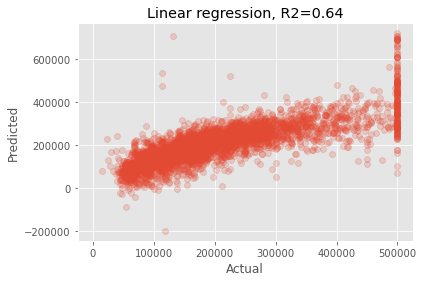

                    Features         Coefs
0                  longitude -71322.935254
1                   latitude -75020.474019
2         housing_median_age  14318.965251
3                total_rooms   2833.797849
4             total_bedrooms   4560.772580
5                 population -44568.542311
6                 households  42075.531936
7              median_income  80762.657623
8            ocean_proximity   7740.511828
9        rooms_per_household   7656.703754
10         bedrooms_per_room  17705.533674
11  population_per_household    688.732518


<Figure size 432x288 with 0 Axes>

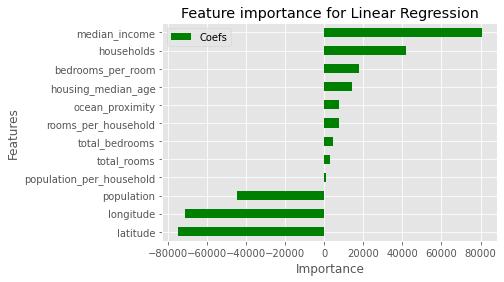

Linear Regression with dropped features
RMSE for Linear Regression with dropped features:  69083.19708252663
MAE for Linear Regression with dropped features:  49841.234893153225
Cross validation mean score for Linear Regression with droppped features:  68668.13631705762
Confidence score for Linear Regression with dropped features:  0.6361575486656652
Feature: 0, Score: -83646.68552
Feature: 1, Score: -87723.94207
Feature: 2, Score: 14615.01994
Feature: 3, Score: -45511.10017
Feature: 4, Score: 50043.44553
Feature: 5, Score: 80987.34293
Feature: 6, Score: 8929.09983
Feature: 7, Score: 18009.80300


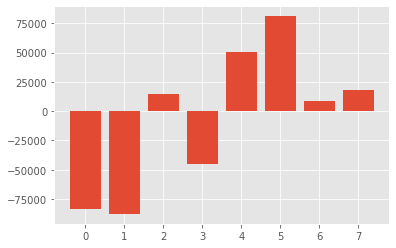

              Features         Coefs
0            longitude -83646.685523
1             latitude -87723.942070
2   housing_median_age  14615.019936
3           population -45511.100171
4           households  50043.445529
5        median_income  80987.342926
6  rooms_per_household   8929.099829
7    bedrooms_per_room  18009.803004


<Figure size 432x288 with 0 Axes>

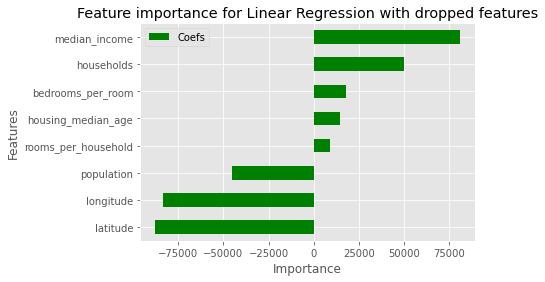

Ridge
Best tuned alpha:  Ridge(alpha=10)
RMSE for Ridge:  68949.4263510749
RMSE for Ridge - tuned hyperparameter:  68951.81268797912
MAE for Ridge:  49590.450245190164
MAE for Ridge - tuned hyperparameter:  49586.11152463357
Cross validation mean score for Ridge:  68471.1859190033
Confidence score for Ridge:  0.6375652527059539
Feature: 0, Score: -71209.39025
Feature: 1, Score: -74902.95024
Feature: 2, Score: 14323.86587
Feature: 3, Score: 2824.21225
Feature: 4, Score: 4612.73286
Feature: 5, Score: -44529.95514
Feature: 6, Score: 41998.39582
Feature: 7, Score: 80769.50799
Feature: 8, Score: 7769.13596
Feature: 9, Score: 7644.04979
Feature: 10, Score: 17700.93830
Feature: 11, Score: 684.41160


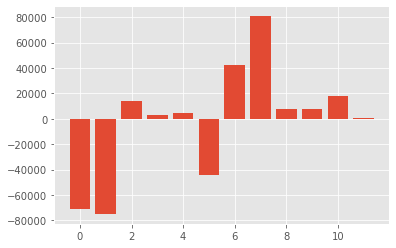

                    Features         Coefs
0                  longitude -71209.390250
1                   latitude -74902.950240
2         housing_median_age  14323.865871
3                total_rooms   2824.212252
4             total_bedrooms   4612.732858
5                 population -44529.955136
6                 households  41998.395822
7              median_income  80769.507985
8            ocean_proximity   7769.135960
9        rooms_per_household   7644.049788
10         bedrooms_per_room  17700.938300
11  population_per_household    684.411596


<Figure size 432x288 with 0 Axes>

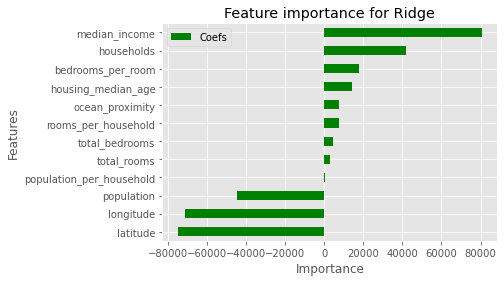

Lasso
Best tuned alpha:  Lasso(alpha=100)
RMSE for Lasso:  68949.27356140257
RMSE for Lasso - tuned hyperparameter:  68959.88211796666
MAE for Lasso:  49590.96063718964
MAE for Lasso - tuned hyperparameter:  49583.312620801335
Cross validation mean score for Lasso:  68471.49629716805
Cross validation mean score for Lasso - tuned hyperparameter:  68457.74563952243
Confidence score for Lasso:  0.6375668589912518
Confidence score for Lasso - tuned hyperparameter:  0.6374553222609383
Feature: 0, Score: -71298.58464
Feature: 1, Score: -74995.10621
Feature: 2, Score: 14318.84922
Feature: 3, Score: 2825.55231
Feature: 4, Score: 4567.48266
Feature: 5, Score: -44554.99065
Feature: 6, Score: 42063.46715
Feature: 7, Score: 80764.29845
Feature: 8, Score: 7745.98218
Feature: 9, Score: 7653.61858
Feature: 10, Score: 17702.71520
Feature: 11, Score: 686.26293


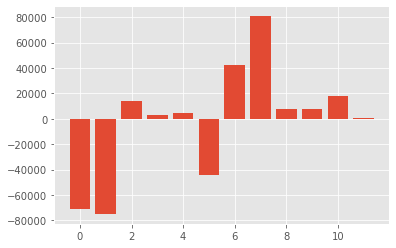

                    Features         Coefs
0                  longitude -71298.584643
1                   latitude -74995.106205
2         housing_median_age  14318.849225
3                total_rooms   2825.552309
4             total_bedrooms   4567.482660
5                 population -44554.990649
6                 households  42063.467151
7              median_income  80764.298447
8            ocean_proximity   7745.982185
9        rooms_per_household   7653.618583
10         bedrooms_per_room  17702.715205
11  population_per_household    686.262930


<Figure size 432x288 with 0 Axes>

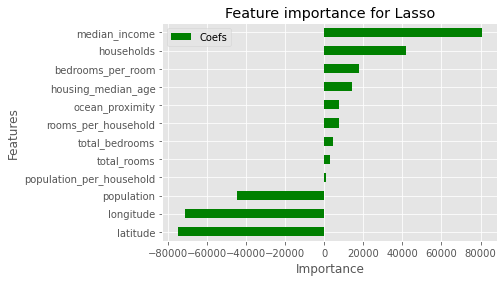

ElasticNet


C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37507328662.80469, tolerance: 17352830983.432537
  model = cd_fast.enet_coordinate_descent(


Best tuned alpha and l1_ratio:  ElasticNet(alpha=100, l1_ratio=1)
RMSE for ElasticNet:  77862.56542923149
RMSE for ElasticNet - tuned hyperparameter:  112897.79882029176
MAE for ElasticNet:  58734.0657319621
Cross validation mean score for ElasticNet:  78592.18271042375
Confidence score for ElasticNet:  0.5378042680576369
                    Features         Coefs
0                  longitude  -8036.632476
1                   latitude -11198.472654
2         housing_median_age  10680.868315
3                total_rooms   4827.262632
4             total_bedrooms   4409.366038
5                 population  -8413.307187
6                 households   5766.610066
7              median_income  49574.576410
8            ocean_proximity  21458.948040
9        rooms_per_household   3567.155577
10         bedrooms_per_room   -474.417383
11  population_per_household  -1573.353973
Feature: 0, Score: -8036.63248
Feature: 1, Score: -11198.47265
Feature: 2, Score: 10680.86832
Feature: 3, Score: 4827

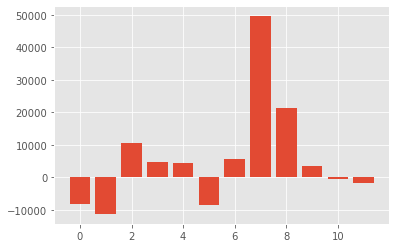

<Figure size 432x288 with 0 Axes>

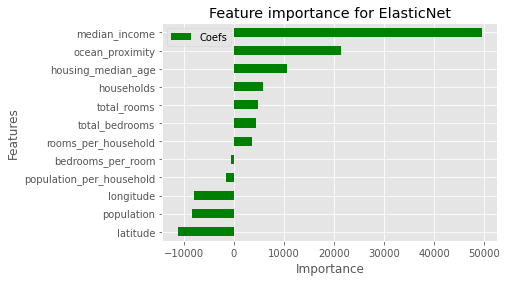

In [46]:
regression_Albina(housing, housing_labels, housing_t, housing_labels_t)